In [27]:
import glob
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def get_pidstat_df(reports_dir, nodes):
    correct_log_header = "Time          UID       PID    %usr %system  %guest   %wait    %CPU   CPU  minflt/s  majflt/s     VSZ     RSS   %MEM   kB_rd/s   kB_wr/s kB_ccwr/s iodelay  Command\n"
    del_col = ["Command", "PID", "%system","%guest", "%wait"]
    pidstat_df = pd.DataFrame()
    
    for node_name in nodes:
        filepath = f"{reports_dir}/{node_name}/pidstat-{node_name}.csv.log"

        # change header since Pandas will not be able to parse it correctly
        with open(filepath, "r") as fh:
            lines = fh.readlines()
        lines[0] = correct_log_header
        # store it in a temporary file object so we don't need to
        # modify the (potentially protected) original file
        data = io.StringIO("".join(lines))

        df = pd.read_fwf(data)
        df["duration"] = df["Time"] - df["Time"][0]
        df["node"] = node_name
        for c in del_col:
               del df[c]
        pidstat_df = pd.concat([pidstat_df, df], ignore_index=True)
    return pidstat_df

# Szenario `vicinity`

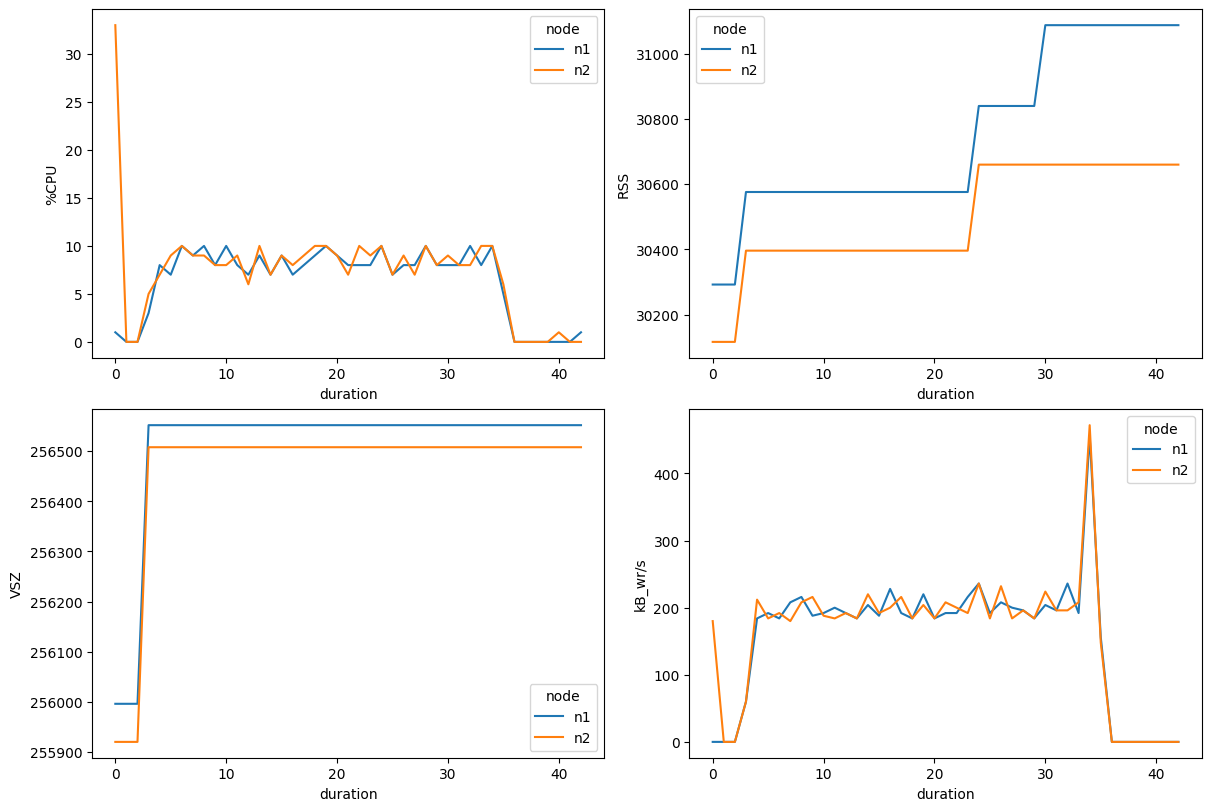

In [48]:
reports_dir = sorted(glob.glob("vicinity/results*"))[-1] # get latest results
nodes = ["n1", "n2"]

pidstat_df = get_pidstat_df(reports_dir, nodes)
cols, rows = [2, 2]

fig, ax = plt.subplots(rows, cols, figsize=(12, 8), constrained_layout=True)
for i, g in enumerate(["%CPU", "RSS", "VSZ", "kB_wr/s"]):
    sns.lineplot(data=pidstat_df, x="duration", y=g, hue="node", ax=ax[i // rows][i % cols])

# Szenario `1k`

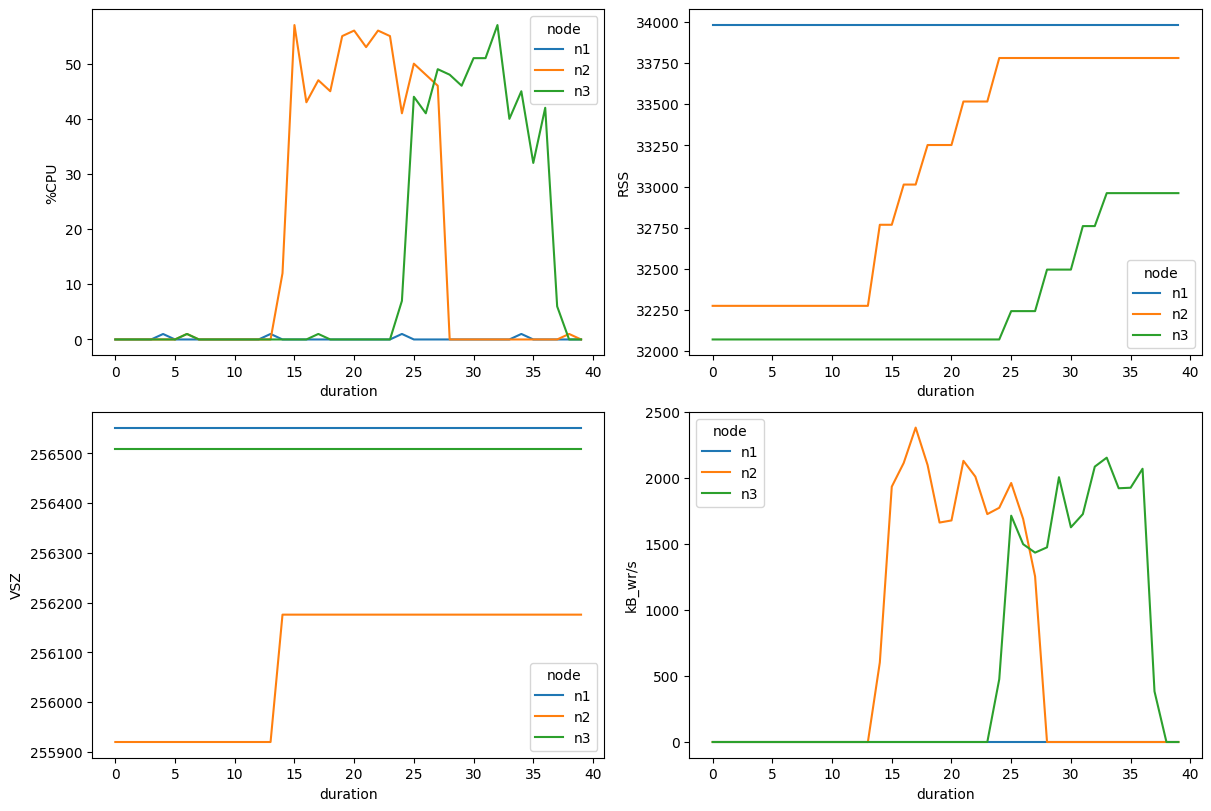

In [51]:
reports_dir = sorted(glob.glob("1k/results*"))[-1] # get latest results
nodes = ["n1", "n2", "n3"]

pidstat_df = get_pidstat_df(reports_dir, nodes)
cols, rows = [2, 2]

fig, ax = plt.subplots(rows, cols, figsize=(12, 8), constrained_layout=True)
for i, g in enumerate(["%CPU", "RSS", "VSZ", "kB_wr/s"]):
    sns.lineplot(data=pidstat_df, x="duration", y=g, hue="node", ax=ax[i // rows][i % cols])

In [49]:
pidstat_df

,Time,UID,%usr,%CPU,CPU,minflt/s,majflt/s,VSZ,RSS,%MEM,kB_rd/s,kB_wr/s,kB_ccwr/s,iodelay,duration,node
0,1662842860,0,1.0,1.0,5,2.0,0.0,255996,30292,0.09,0.0,0.0,0.0,0,0,n1
1,1662842861,0,0.0,0.0,5,0.0,0.0,255996,30292,0.09,0.0,0.0,0.0,0,1,n1
2,1662842862,0,0.0,0.0,5,0.0,0.0,255996,30292,0.09,0.0,0.0,0.0,0,2,n1
3,1662842863,0,3.0,3.0,3,85.0,0.0,256552,30576,0.09,0.0,60.0,0.0,0,3,n1
4,1662842864,0,7.0,8.0,2,9.0,0.0,256552,30576,0.09,0.0,184.0,0.0,0,4,n1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1662842898,0,0.0,0.0,2,0.0,0.0,256508,30660,0.09,0.0,0.0,0.0,0,38,n2
82,1662842899,0,0.0,0.0,2,0.0,0.0,256508,30660,0.09,0.0,0.0,0.0,0,39,n2
83,1662842900,0,0.0,1.0,2,0.0,0.0,256508,30660,0.09,0.0,0.0,0.0,0,40,n2
84,1662842901,0,0.0,0.0,2,0.0,0.0,256508,30660,0.09,0.0,0.0,0.0,0,41,n2


<AxesSubplot:xlabel='duration', ylabel='%CPU'>

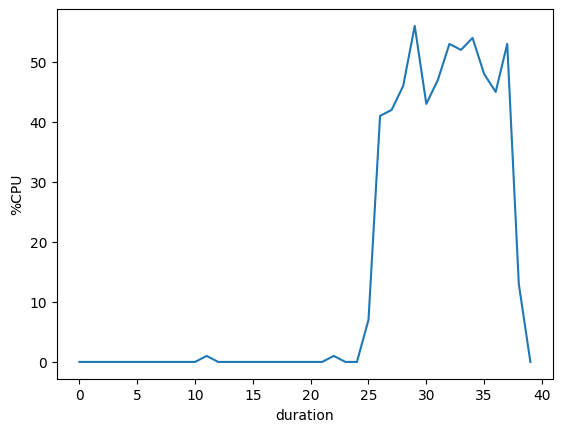

In [158]:
show_node = "n3"
show_node_df = pidstat_df[pidstat_df["node"] == show_node]
sns.lineplot(data=show_node_df, x="duration", y="%CPU")

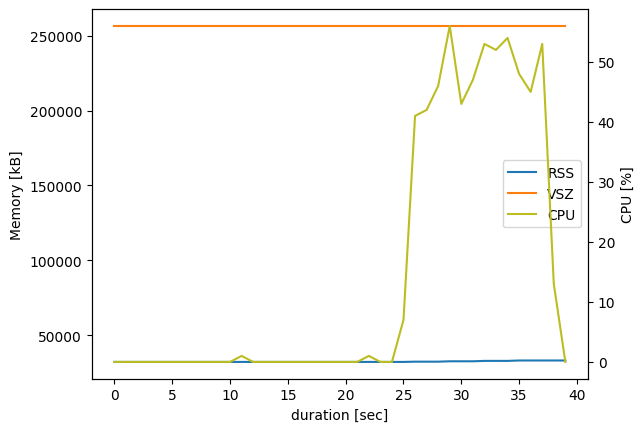

In [159]:
dfm = show_node_df[["duration", "RSS", "VSZ"]].melt("duration", var_name="metric", value_name="value")

g1 = sns.lineplot(x="duration", y="value", hue="metric", data=dfm)
g2 = sns.lineplot(x="duration", y="%CPU", data=show_node_df[["duration", "%CPU"]], ax=g1.axes.twinx(), color="C8", label="CPU")

g1.set_ylabel("Memory [kB]")
g1.set_xlabel("duration [sec]")
g2.set_ylabel("CPU [%]")

h1, l1 = g1.get_legend_handles_labels()
h2, l2 = g2.get_legend_handles_labels()
g1.legend(h1+h2, l1+l2)
g2.legend().remove()

In [96]:
g1.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7f8094ca0730>,
 ['RSS', 'VSZ'])